In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [41]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [18]:
%store -r X_motion_relative
%store -r Y_motion_relative
print(X_motion_relative.shape)
print(Y_motion_relative.shape)

%store -r X_motion_CoM
%store -r Y_motion_CoM
print(X_motion_CoM.shape)
print(Y_motion_CoM.shape)

(27032, 27)
(27032, 8)
(27032, 22)
(27032, 2)


In [6]:
%store -r model_fl_relative_swinging_x
%store -r model_fl_relative_support_x
%store -r model_fl_relative_swinging_y
%store -r model_fl_relative_support_y

%store -r model_fr_relative_swinging_x
%store -r model_fr_relative_support_x
%store -r model_fr_relative_swinging_y
%store -r model_fr_relative_support_y

%store -r model_rl_relative_swinging_x
%store -r model_rl_relative_support_x
%store -r model_rl_relative_swinging_y
%store -r model_rl_relative_support_y

%store -r model_rr_relative_swinging_x
%store -r model_rr_relative_support_x
%store -r model_rr_relative_swinging_y
%store -r model_rr_relative_support_y

%store -r model_fl_com_x
%store -r model_fl_com_y
%store -r model_fr_com_x
%store -r model_fr_com_y

# Foot prediction test

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [42]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict

## Test Foot Models

In [8]:
X_motion_relative[1, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.67128601e-27,  1.56430903e-26,
        7.73122404e-03,  9.99970114e-01,  2.02702748e-04,  1.18196215e-04,
        1.73000000e-01,  1.36000000e-01, -3.40000000e-01,  2.06000000e-01,
       -1.35000000e-01, -3.39000000e-01, -2.68000000e-01,  1.36000000e-01,
       -3.40000000e-01, -2.92000000e-01, -1.36000000e-01, -3.40000000e-01,
        0.00000000e+00,  1.00000000e+00,  1.63241605e+09])

In [9]:
Y_motion_relative[1, :]

array([ 0.029, -0.004, -0.027, -0.002, -0.025,  0.001,  0.02 , -0.001])

In [19]:
X_motion_CoM[1, :]

array([0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.173, 0.136, -0.34, 0.206, -0.135,
       -0.339, -0.268, 0.136, -0.34, -0.292, -0.136, -0.34, False, True,
       0.01200000000000001, -0.0010000000000000009], dtype=object)

In [20]:
Y_motion_CoM[1, :]

array([0.026999999999999996, 0.0020000000000000018], dtype=object)

[0.7, 0.0, 0.0] [1. 0.] [[0.17848641]] [[-0.00537014]]


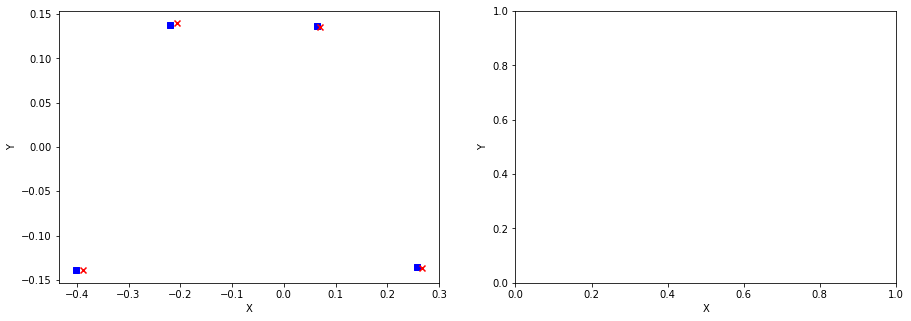

[0.7, 0.0, 0.0] [1. 0.] [[0.16730842]] [[-0.01294768]]


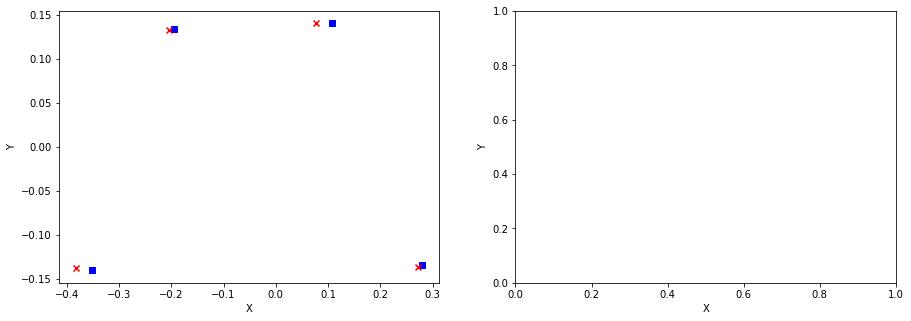

[0.7, 0.0, 0.0] [1. 0.] [[0.17765806]] [[-0.0102313]]


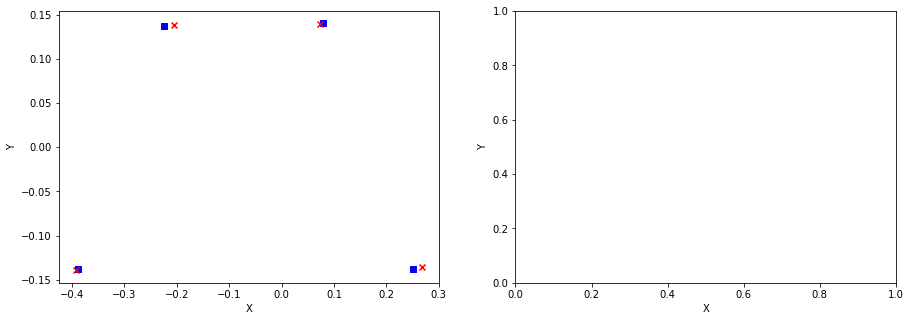

[0.7, 0.0, 0.0] [1. 0.] [[0.19145948]] [[-0.01723178]]


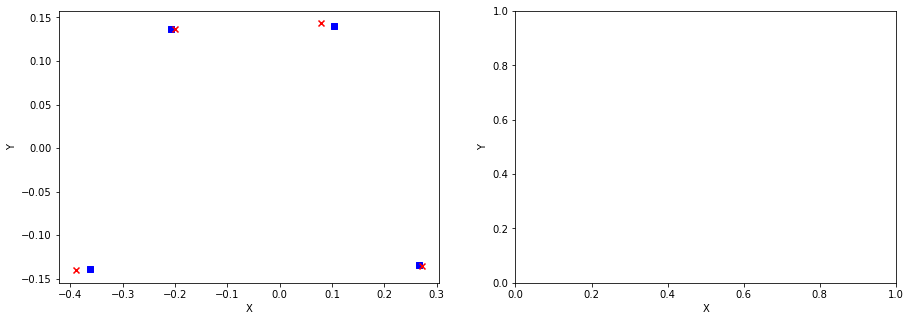

[0.7, 0.0, 0.0] [0. 1.] [[0.09233827]] [[0.00489637]]


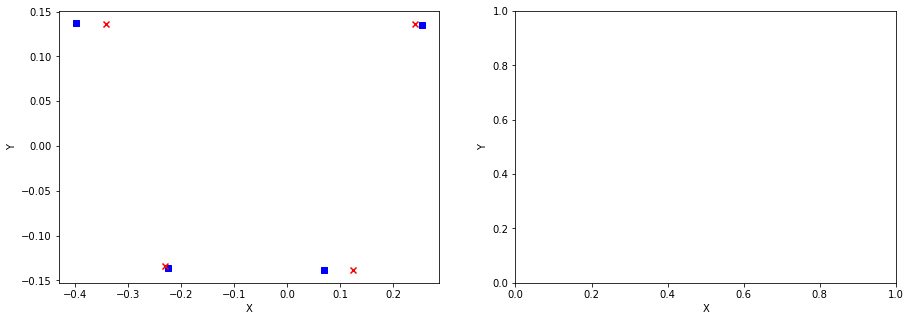

[0.7, 0.0, 0.0] [1. 0.] [[0.17849346]] [[-0.01040757]]


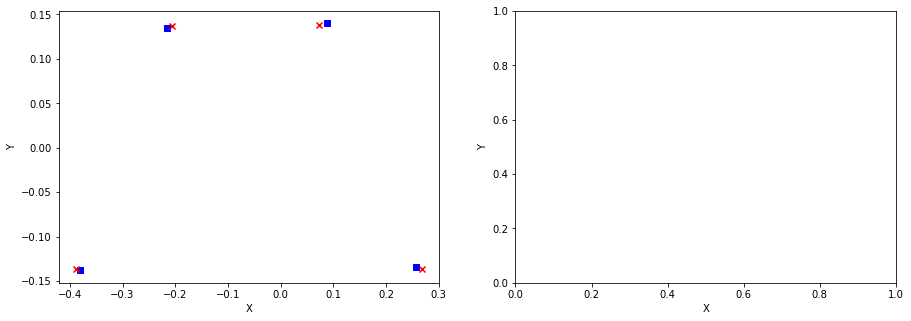

[0.7, 0.0, 0.0] [1. 0.] [[0.09611243]] [[-0.01125584]]


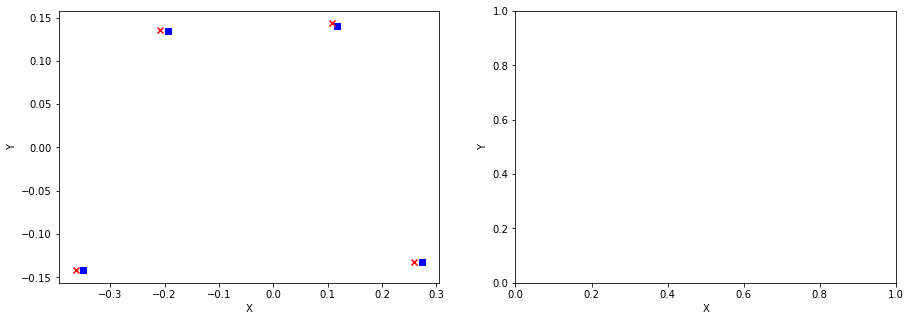

[0.7, 0.0, 0.0] [0. 1.] [[0.17928075]] [[0.00646637]]


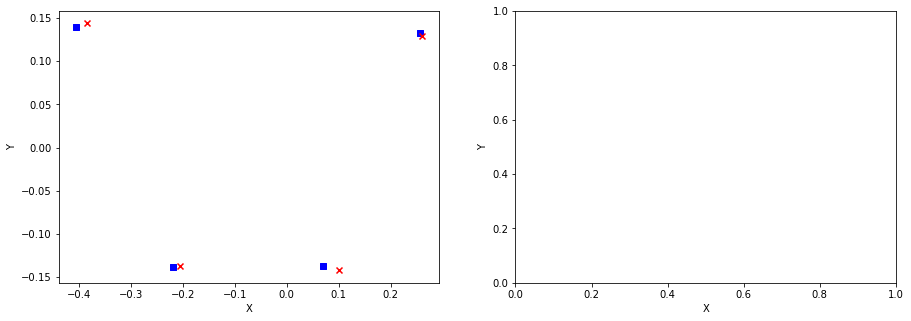

[0.7, 0.0, 0.0] [0. 1.] [[0.1768593]] [[0.00503162]]


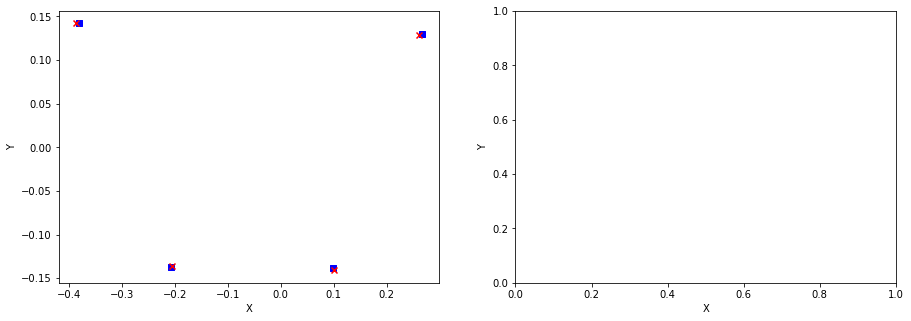

[0.7, 0.0, 0.0] [0. 1.] [[0.16185916]] [[0.00088039]]


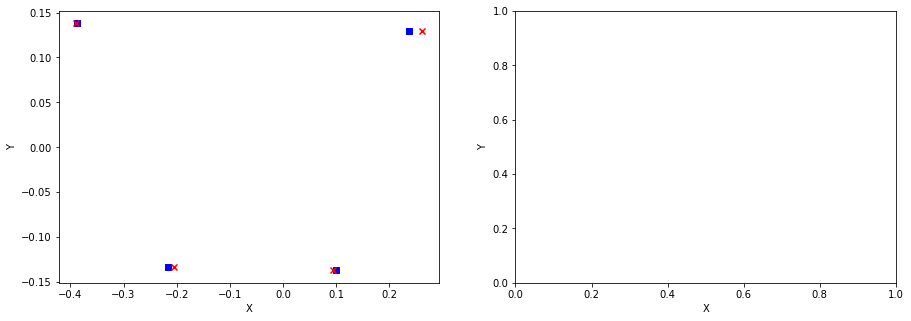

[0.7, 0.0, 0.0] [0. 1.] [[0.14961897]] [[-0.00050916]]


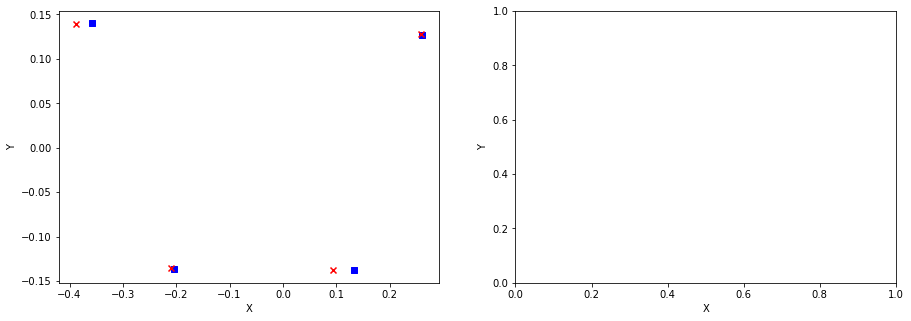

[0.7, 0.0, 0.0] [1. 0.] [[0.19120432]] [[-0.00375496]]


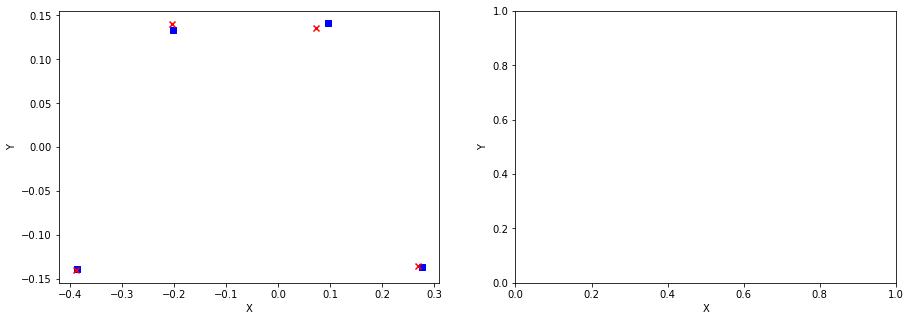

[0.7, 0.0, 0.0] [0. 1.] [[0.16789149]] [[0.00999977]]


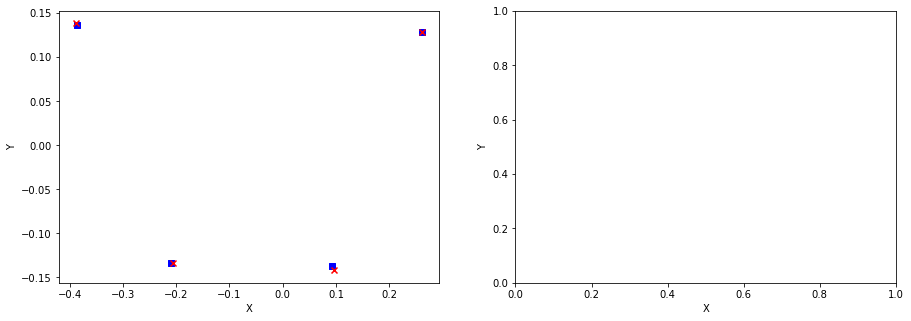

[0.7, 0.0, 0.0] [1. 0.] [[0.17775433]] [[-0.01220518]]


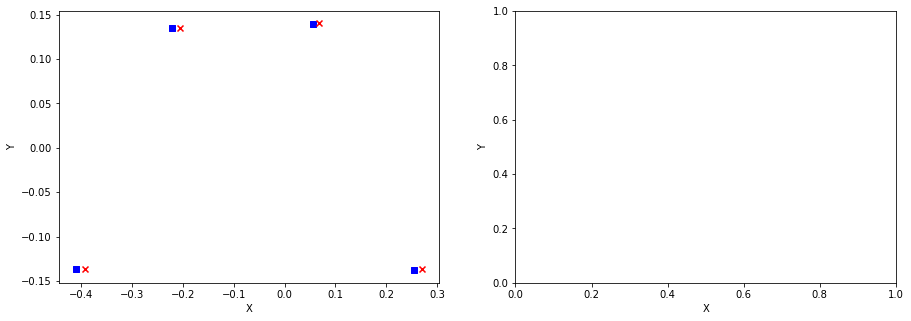

[0.7, 0.0, 0.0] [1. 0.] [[0.19005263]] [[-0.00118369]]


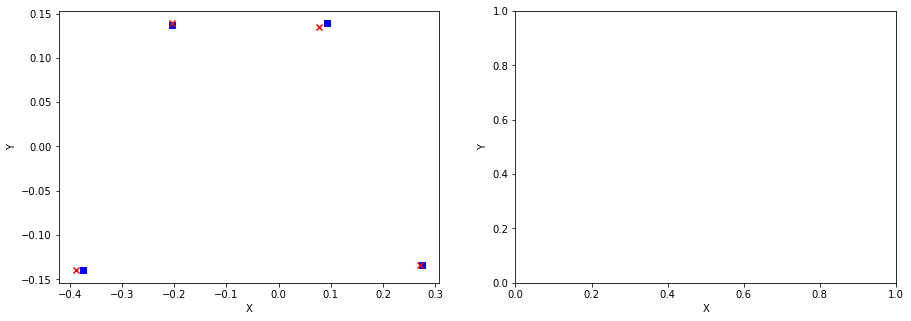

[0.7, 0.0, 0.0] [1. 0.] [[0.1780055]] [[-0.00424571]]


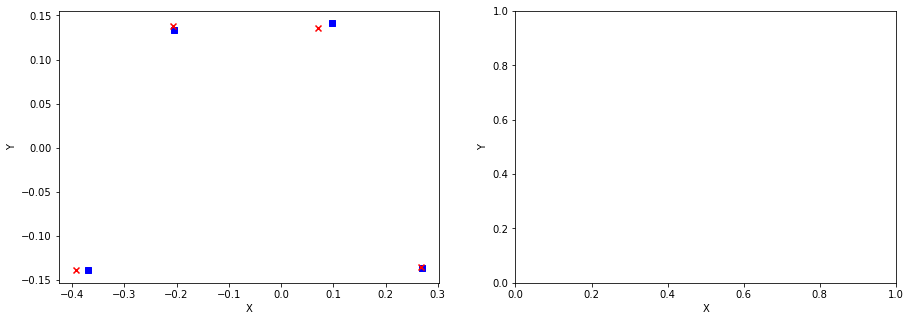

[0.7, 0.0, 0.0] [1. 0.] [[0.19273491]] [[-0.00975991]]


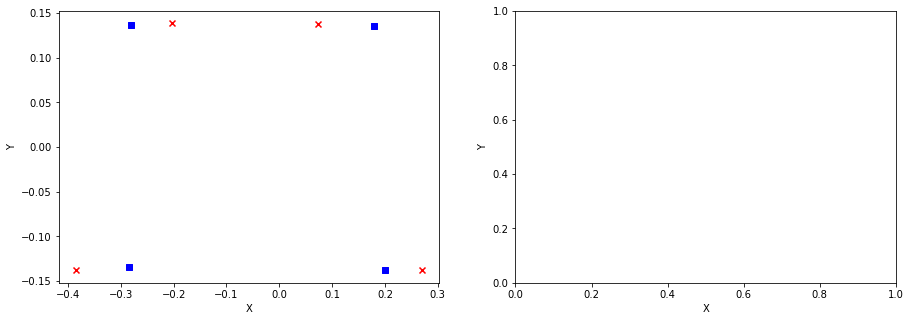

[0.7, 0.0, 0.0] [1. 0.] [[0.20023254]] [[-0.00822796]]


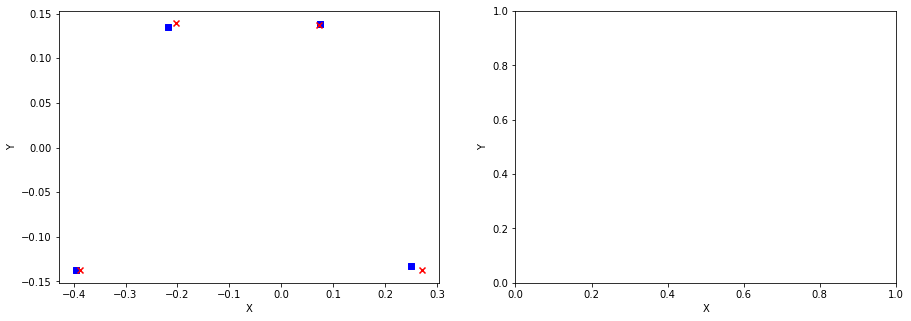

[0.7, 0.0, 0.0] [1. 0.] [[0.1744261]] [[-0.00933908]]


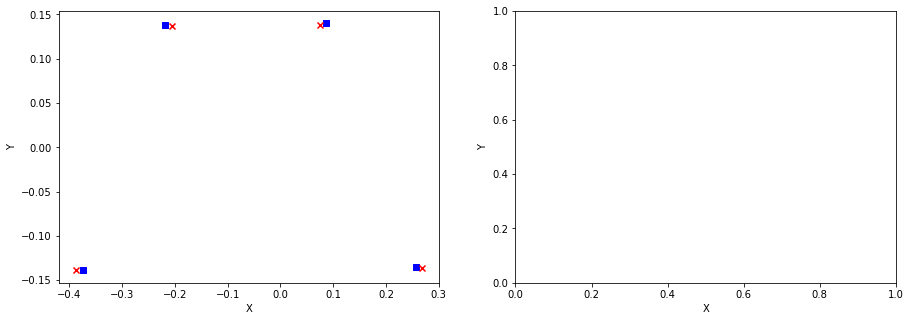

[0.7, 0.0, 0.0] [1. 0.] [[0.18010441]] [[-0.01094128]]


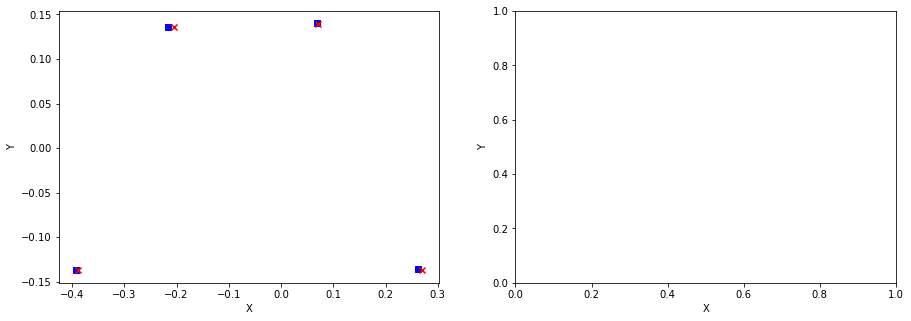

[0.7, 0.0, 0.0] [0. 1.] [[0.1601356]] [[0.00580088]]


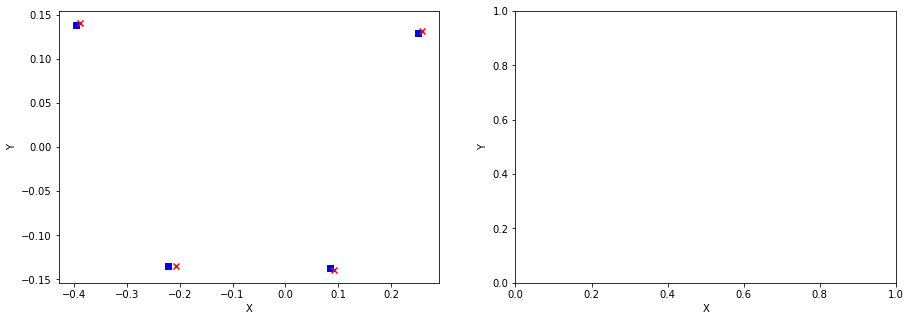

[0.7, 0.0, 0.0] [0. 1.] [[0.17692943]] [[0.00125182]]


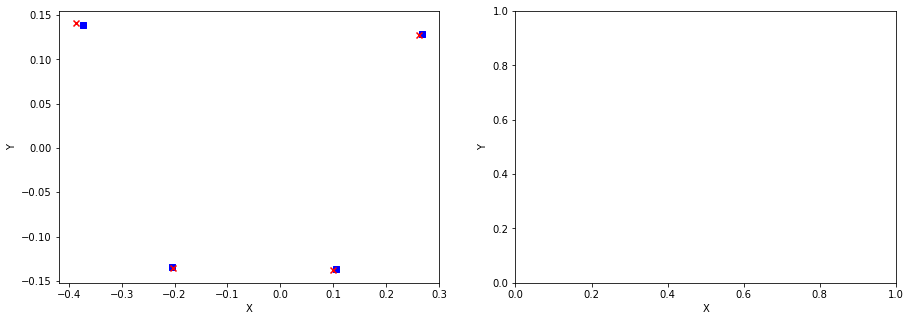

[0.7, 0.0, 0.0] [0. 1.] [[0.15464105]] [[-0.0001198]]


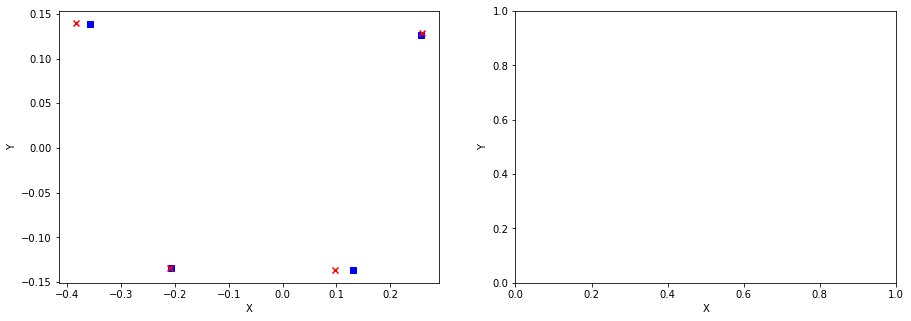

[0.7, 0.0, 0.0] [1. 0.] [[0.17927223]] [[-0.01364234]]


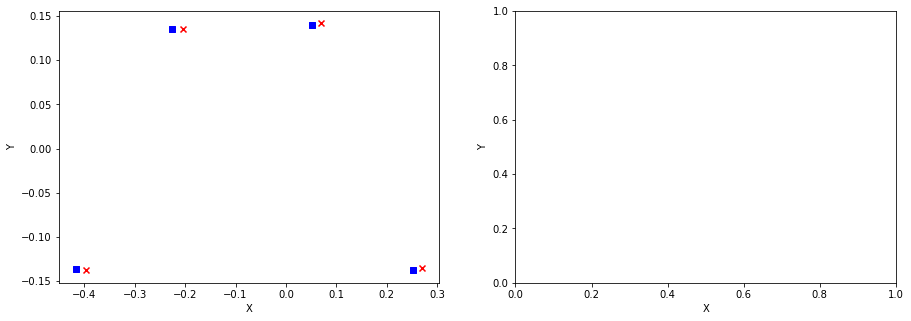

[0.7, 0.0, 0.0] [1. 0.] [[0.17902811]] [[-0.01258422]]


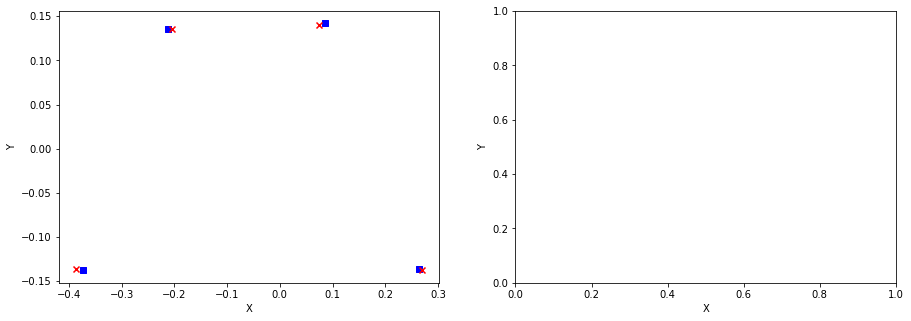

[0.7, 0.0, 0.0] [0. 1.] [[0.1539464]] [[3.8913611e-05]]


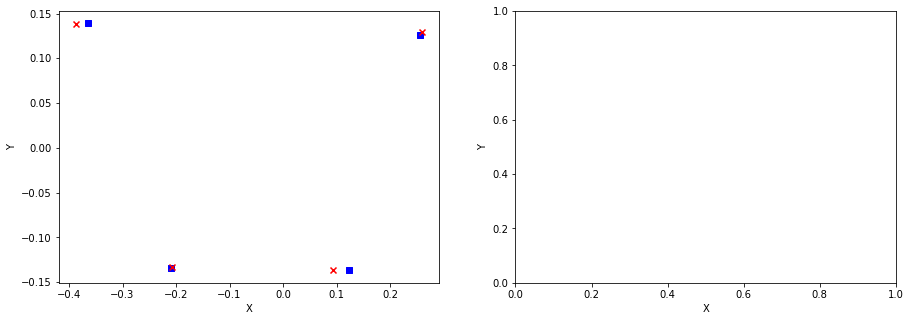

[0.7, 0.0, 0.0] [0. 1.] [[0.16920072]] [[0.00540468]]


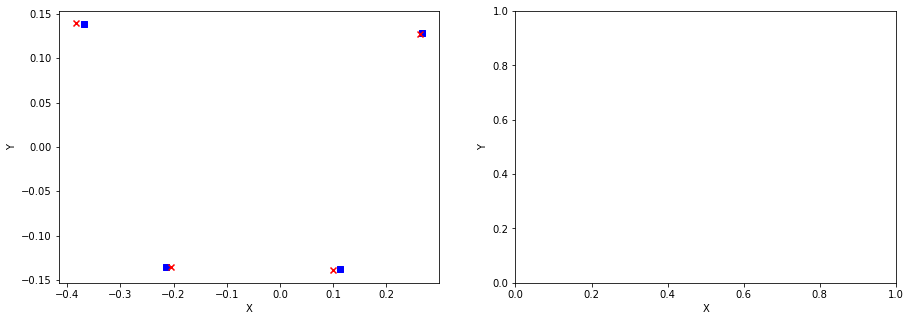

[0.7, 0.0, 0.0] [1. 0.] [[0.18132822]] [[-0.01034802]]


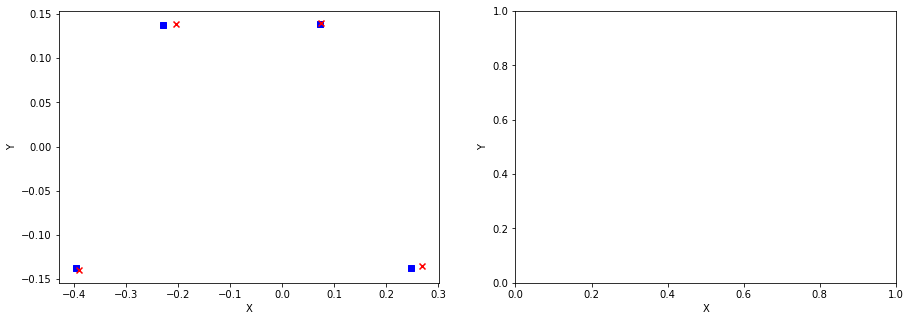

[0.7, 0.0, 0.0] [1. 0.] [[0.1953975]] [[-0.01164108]]


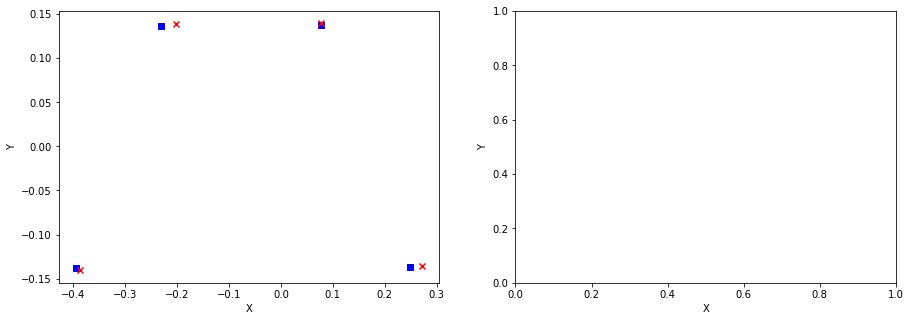

[0.7, 0.0, 0.0] [1. 0.] [[0.16412019]] [[-0.01234563]]


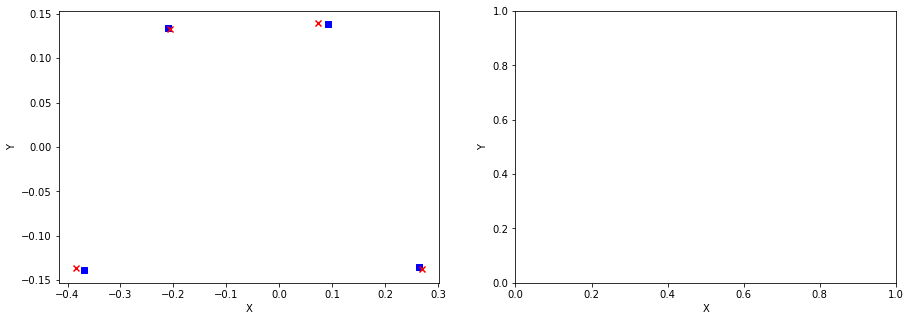

[0.7, 0.0, 0.0] [0. 1.] [[0.16852775]] [[-0.00070813]]


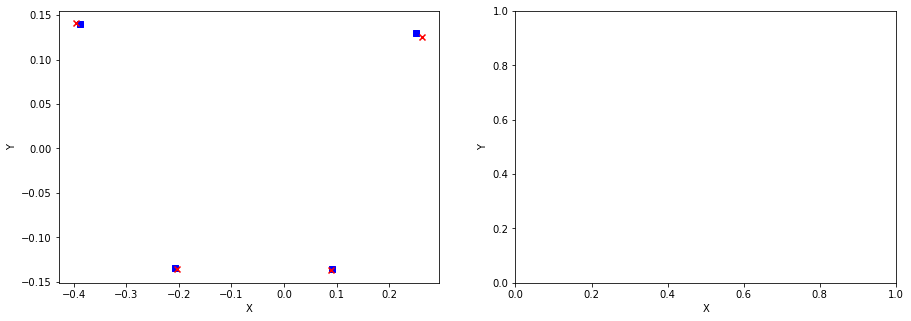

[0.7, 0.0, 0.0] [0. 1.] [[0.15027357]] [[0.00047711]]


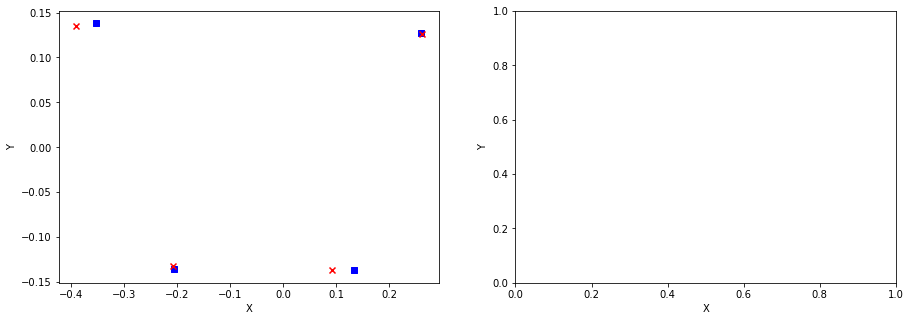

[0.7, 0.0, 0.0] [0. 1.] [[0.15456807]] [[-0.00239689]]


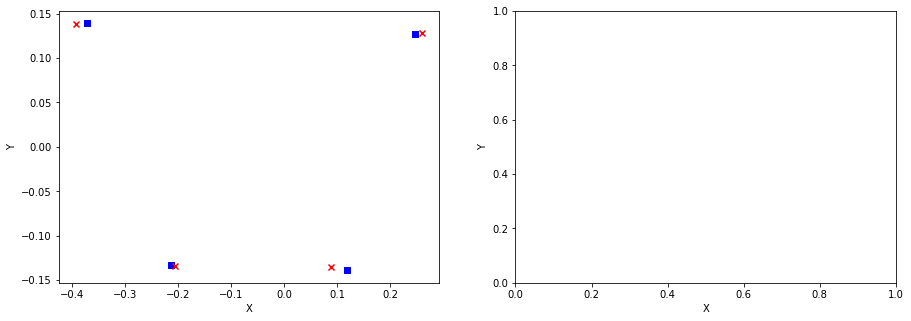

[0.7, 0.0, 0.0] [1. 0.] [[0.1686496]] [[-0.00716385]]


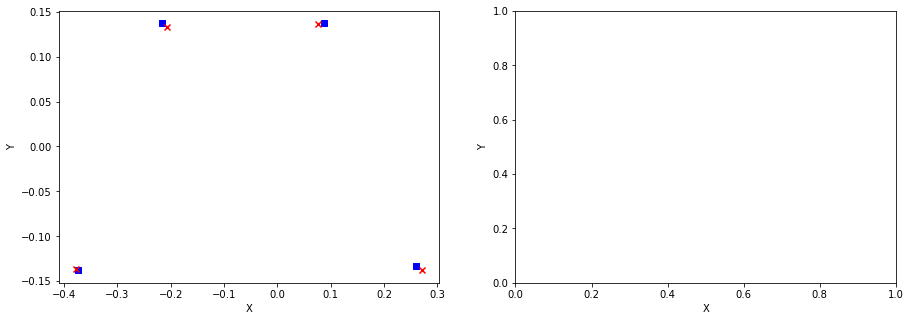

[0.7, 0.0, 0.0] [0. 1.] [[0.16948488]] [[0.00096031]]


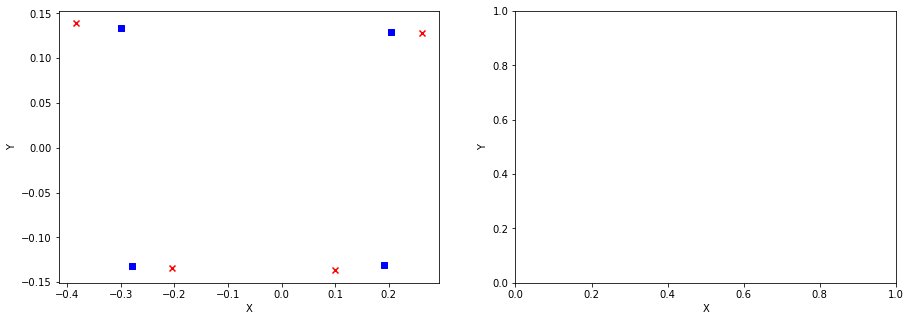

[0.7, 0.0, 0.0] [1. 0.] [[0.09541805]] [[-0.01206362]]


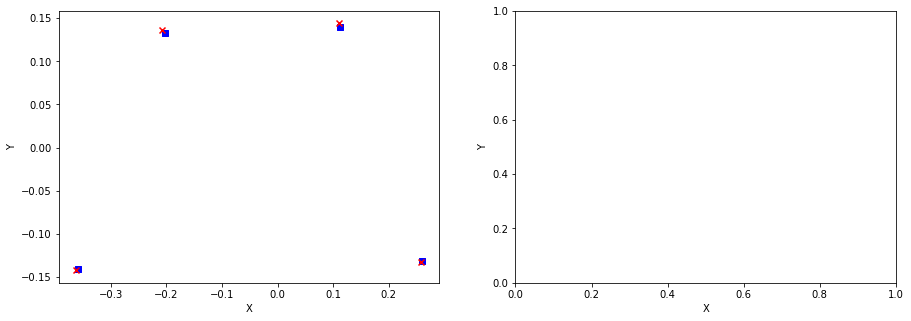

[0.7, 0.0, 0.0] [0. 1.] [[0.15698894]] [[0.00017568]]


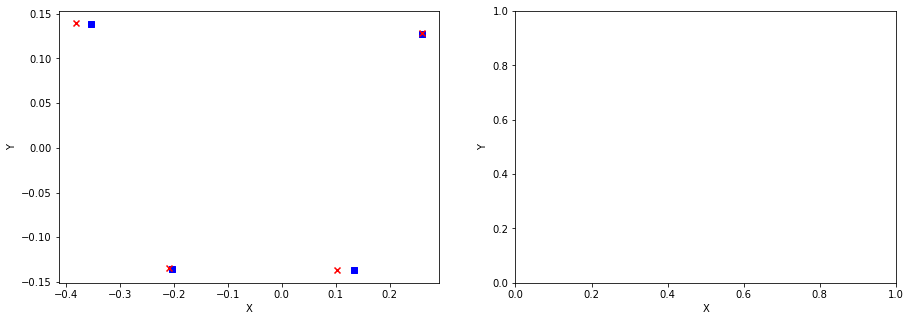

[0.7, 0.0, 0.0] [1. 0.] [[0.17633383]] [[-0.01680355]]


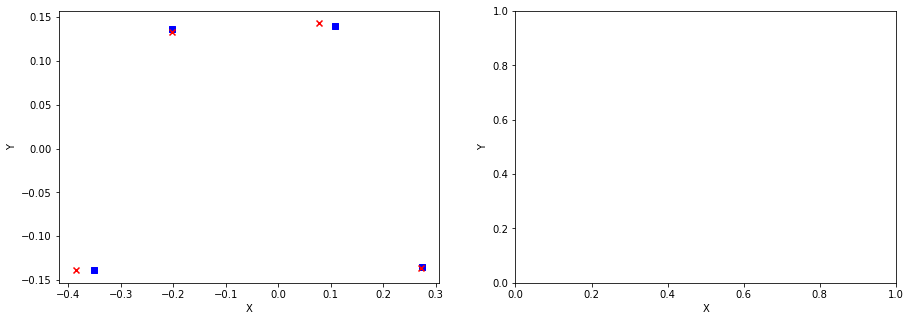

[0.7, 0.0, 0.0] [0. 1.] [[0.18054942]] [[0.00512519]]


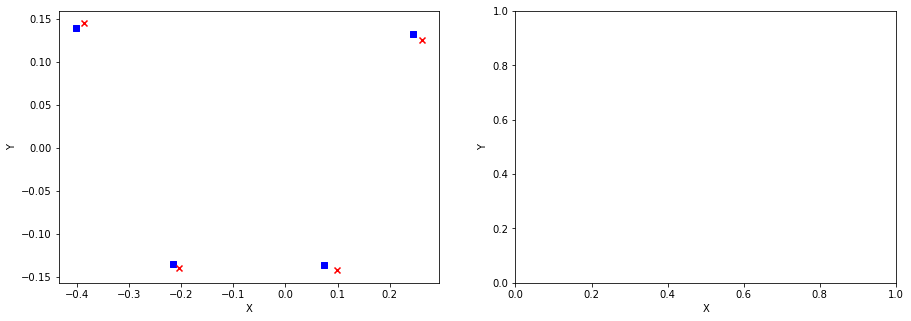

[0.7, 0.0, 0.0] [0. 1.] [[0.17690158]] [[0.00416264]]


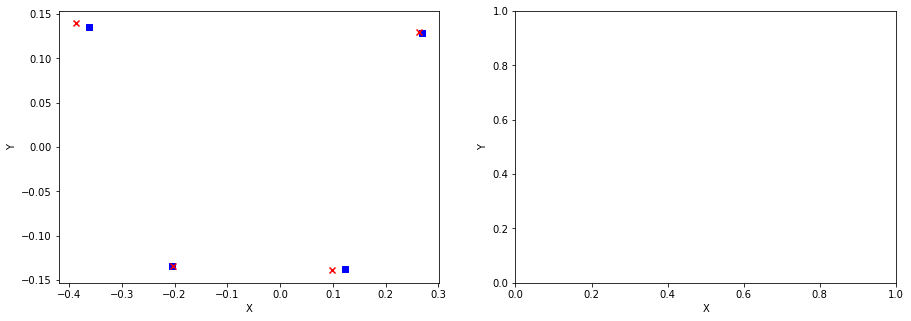

[0.7, 0.0, 0.0] [0. 1.] [[0.18333205]] [[0.00219489]]


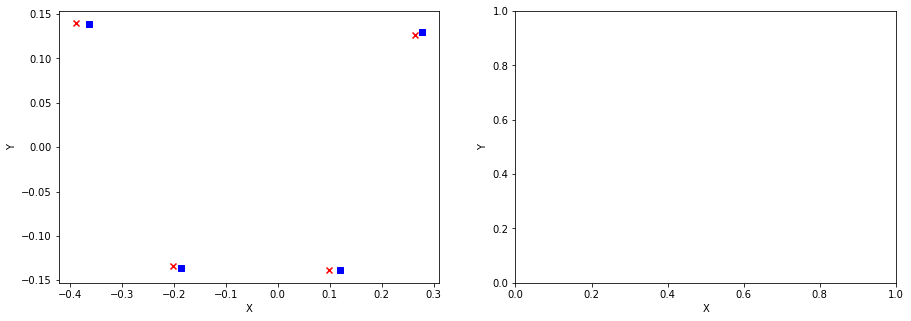

[0.7, 0.0, 0.0] [0. 1.] [[0.16550014]] [[0.00021094]]


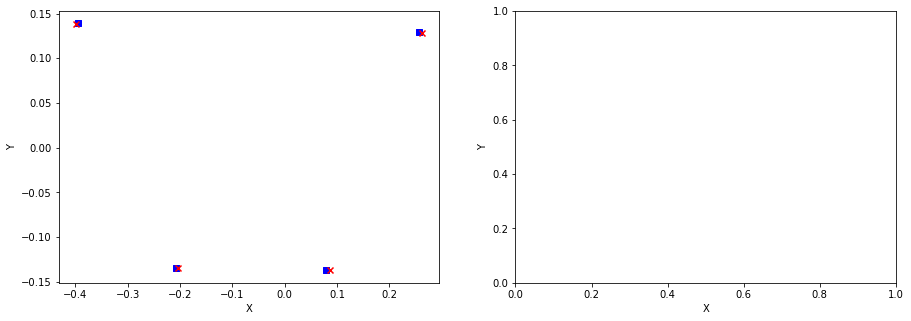

[0.7, 0.0, 0.0] [0. 1.] [[0.16015883]] [[-0.00036494]]


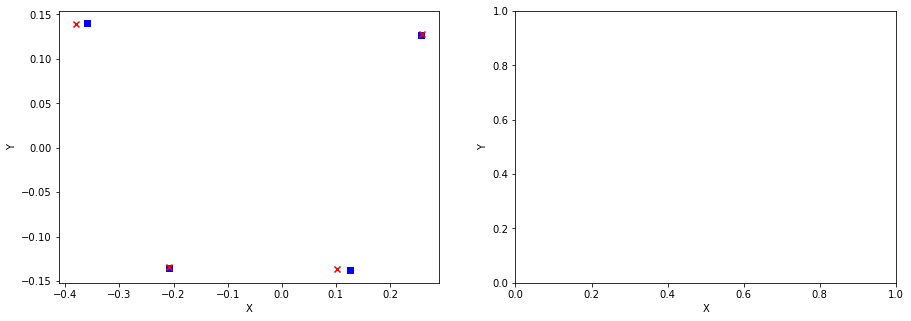

[0.7, 0.0, 0.0] [1. 0.] [[0.18802725]] [[-0.00568464]]


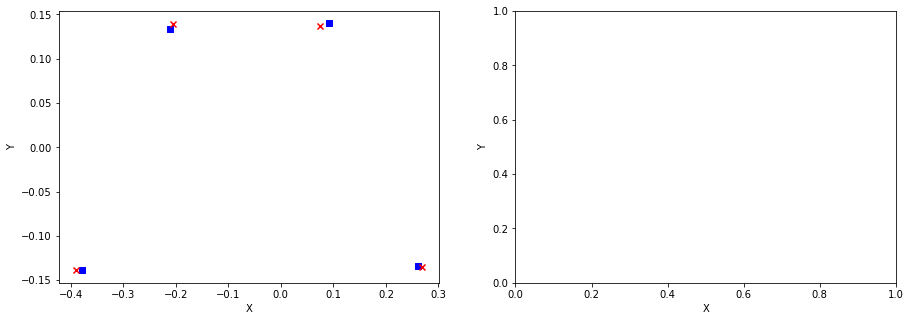

[0.7, 0.0, 0.0] [0. 1.] [[0.15581512]] [[0.00325345]]


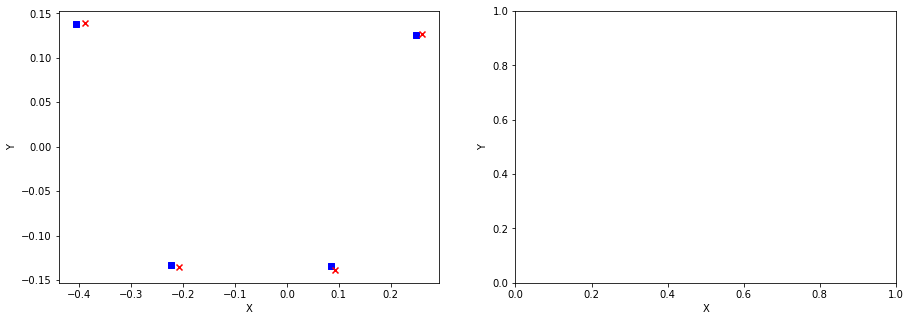

[0.7, 0.0, 0.0] [0. 1.] [[0.17912227]] [[0.01696976]]


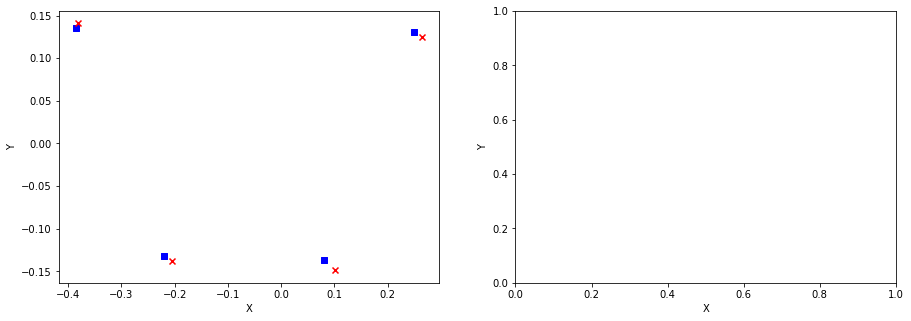

[0.7, 0.0, 0.0] [1. 0.] [[0.17998651]] [[-0.01069816]]


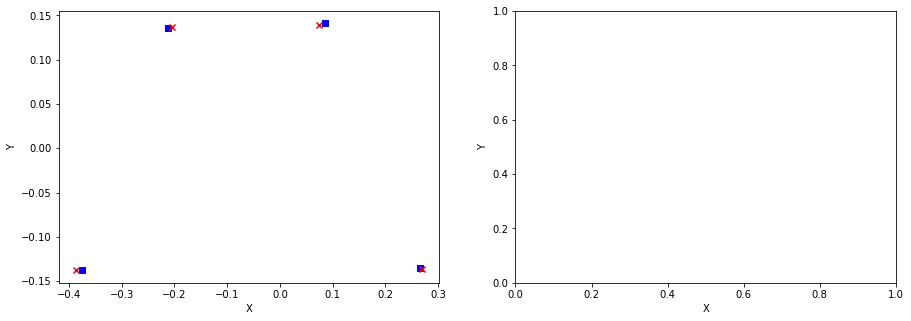

[0.7, 0.0, 0.0] [0. 1.] [[0.15770045]] [[0.00282897]]


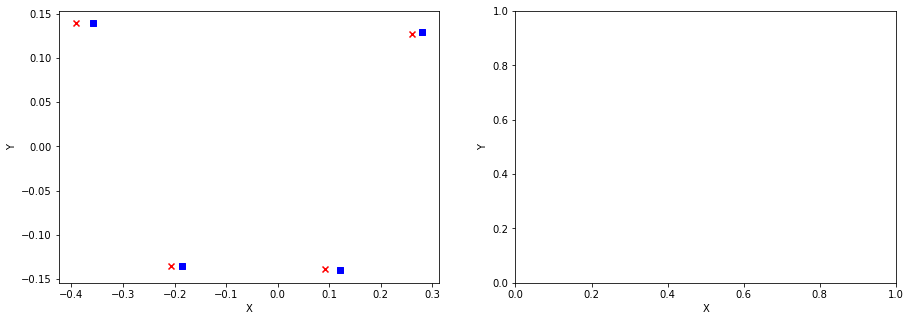

[0.7, 0.0, 0.0] [0. 1.] [[0.15718986]] [[0.000268]]


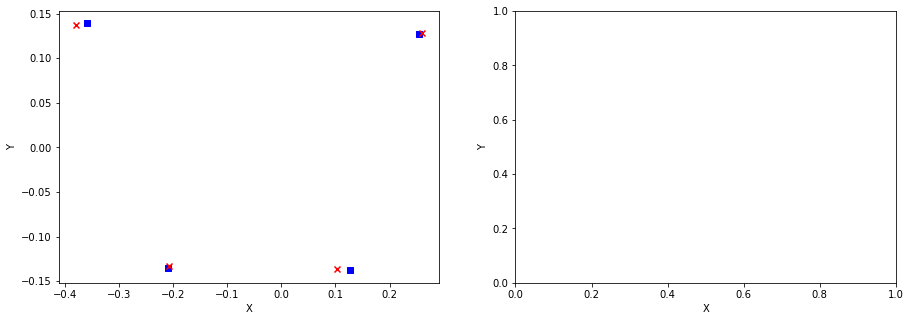

[0.7, 0.0, 0.0] [0. 1.] [[0.17459243]] [[0.0101617]]


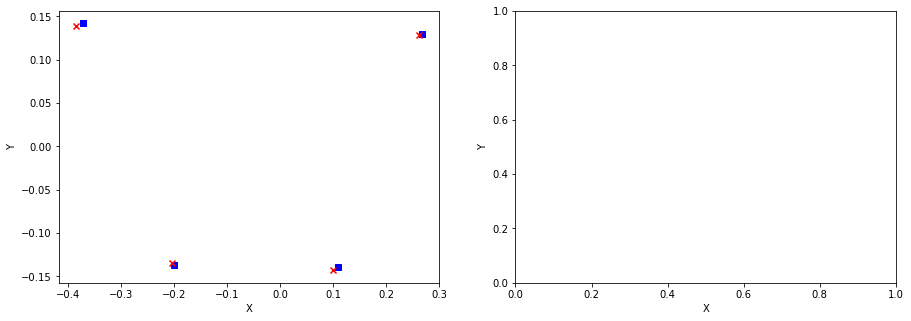

[0.7, 0.0, 0.0] [0. 1.] [[0.17828916]] [[0.00453951]]


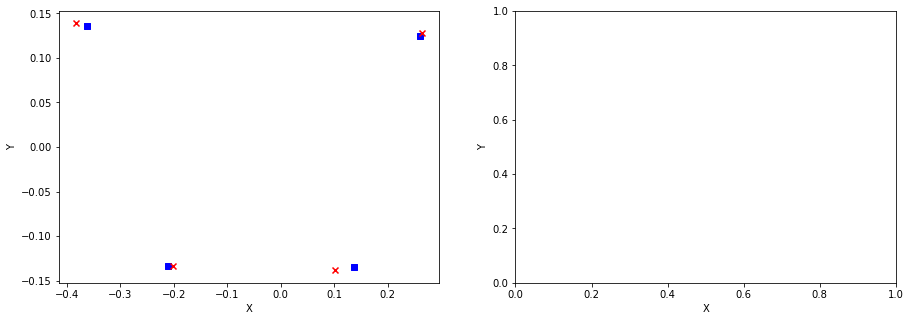

[0.7, 0.0, 0.0] [1. 0.] [[0.19277635]] [[-0.0111259]]


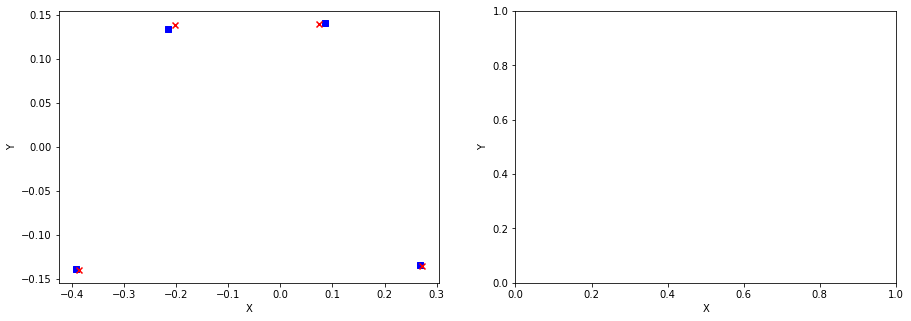

[0.7, 0.0, 0.0] [0. 1.] [[0.16830798]] [[0.00372848]]


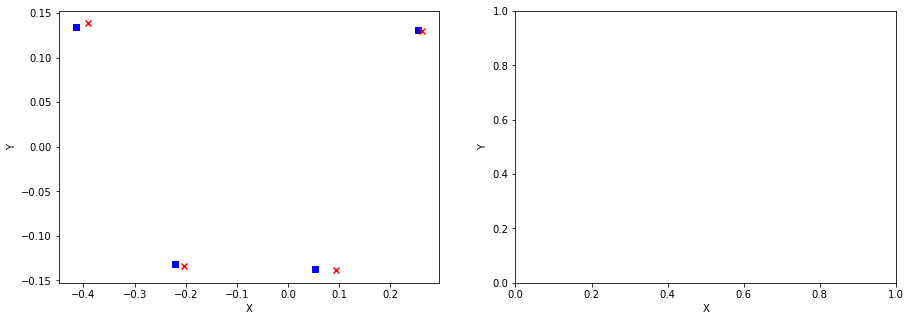

[0.7, 0.0, 0.0] [0. 1.] [[0.18470665]] [[0.00129158]]


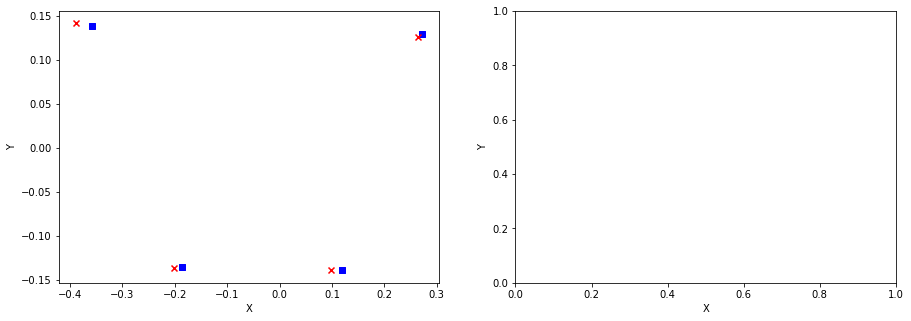

[0.7, 0.0, 0.0] [0. 1.] [[0.15707409]] [[0.00551997]]


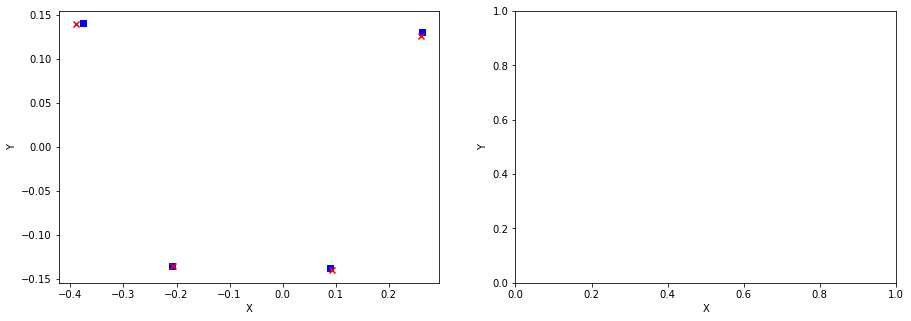

[0.7, 0.0, 0.0] [0. 1.] [[0.15391121]] [[-0.00066153]]


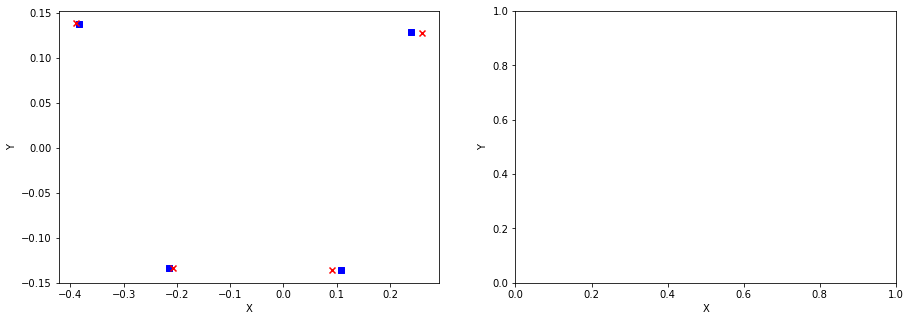

[0.7, 0.0, 0.0] [0. 1.] [[0.15860512]] [[-0.00026295]]


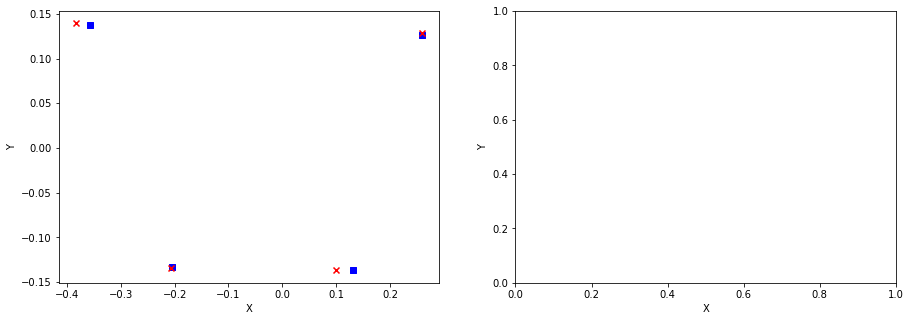

[0.7, 0.0, 0.0] [1. 0.] [[0.1798402]] [[-0.00838366]]


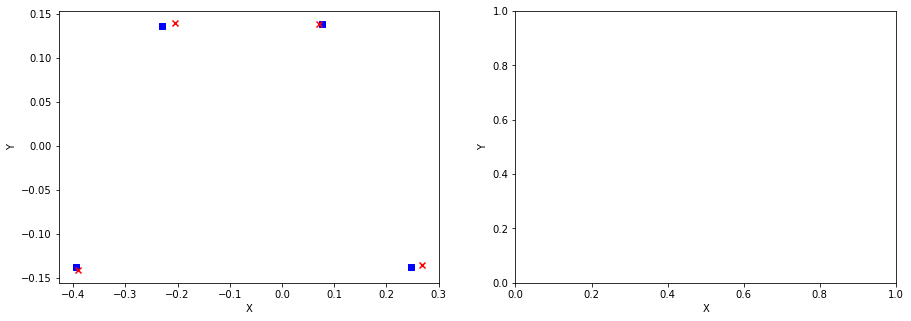

[0.7, 0.0, 0.0] [0. 1.] [[0.15713582]] [[0.00025769]]


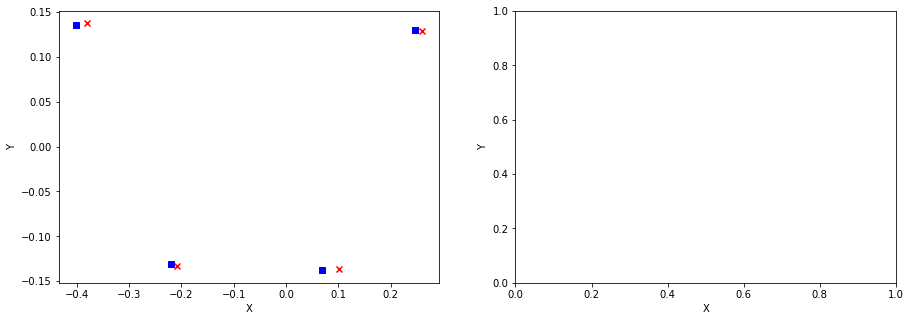

[0.7, 0.0, 0.0] [1. 0.] [[0.17814214]] [[-0.01826351]]


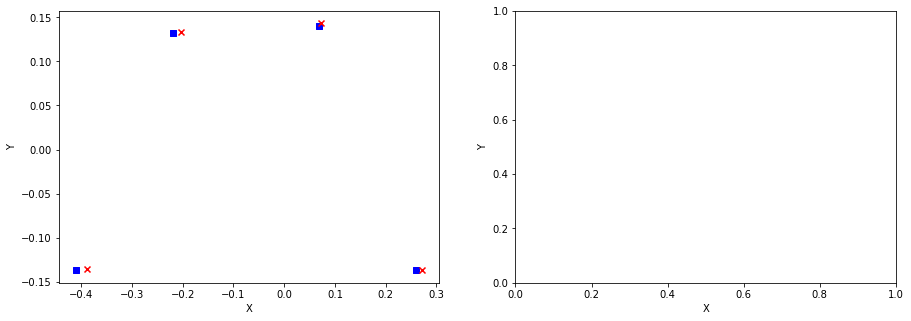

[0.7, 0.0, 0.0] [0. 1.] [[0.10247996]] [[0.00421004]]


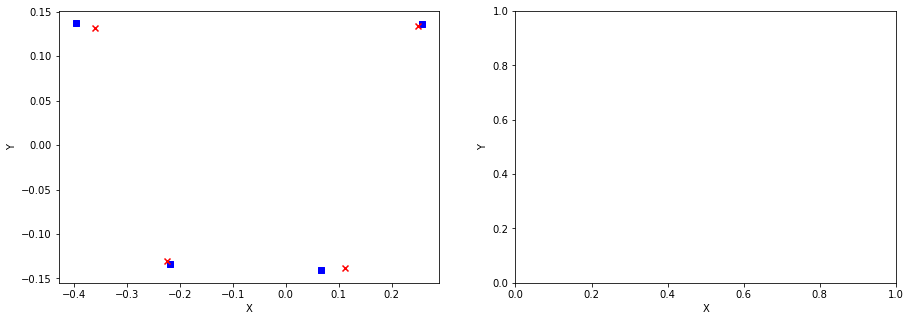

[0.7, 0.0, 0.0] [0. 1.] [[0.15347425]] [[-0.00104375]]


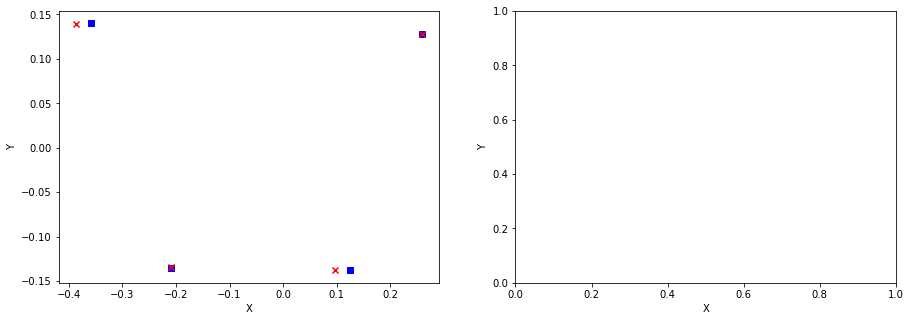

[0.7, 0.0, 0.0] [0. 1.] [[0.15494545]] [[0.00011628]]


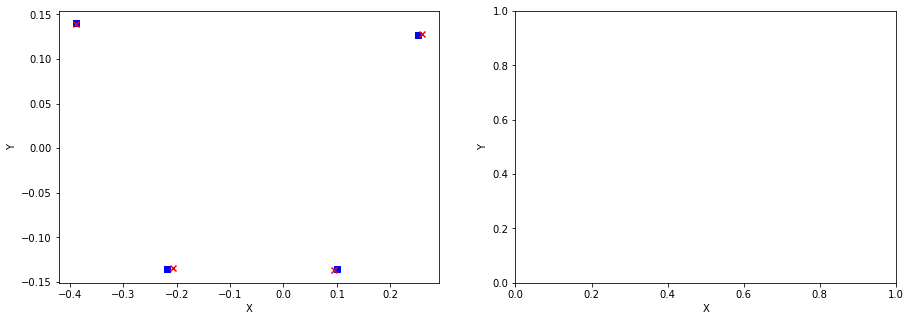

[0.7, 0.0, 0.0] [1. 0.] [[0.19627228]] [[-0.01003041]]


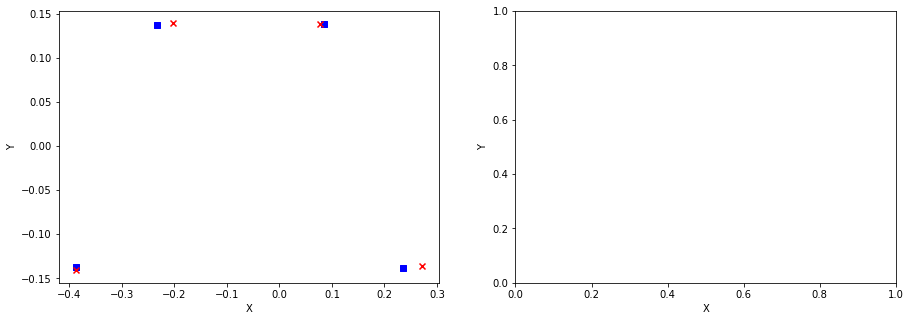

[0.7, 0.0, 0.0] [1. 0.] [[0.18125019]] [[-0.00773576]]


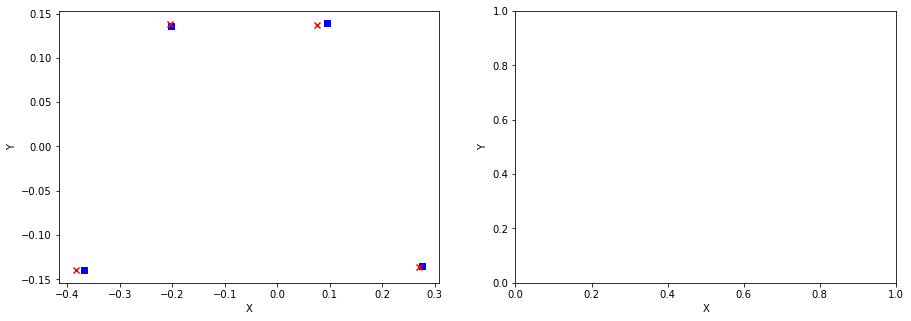

[0.7, 0.0, 0.0] [1. 0.] [[0.17732575]] [[-0.00734889]]


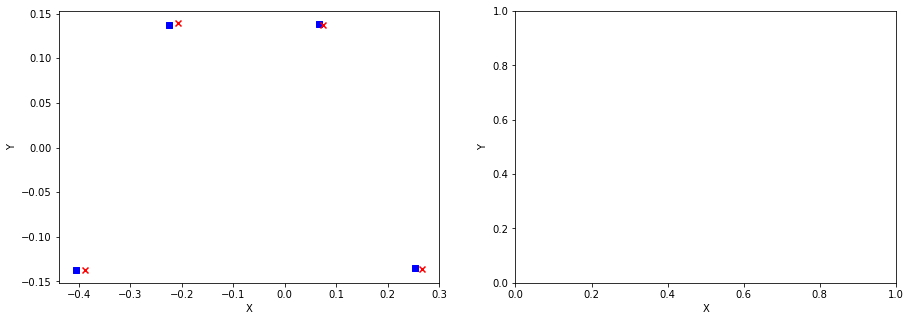

[0.7, 0.0, 0.0] [0. 1.] [[0.18333205]] [[0.00219489]]


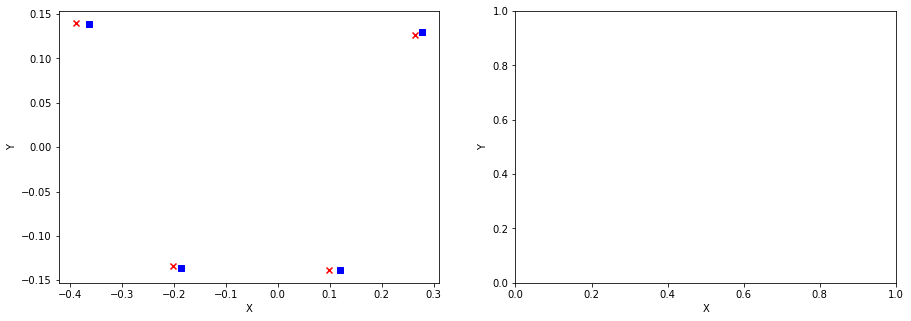

[0.7, 0.0, 0.0] [1. 0.] [[0.19350108]] [[0.00599693]]


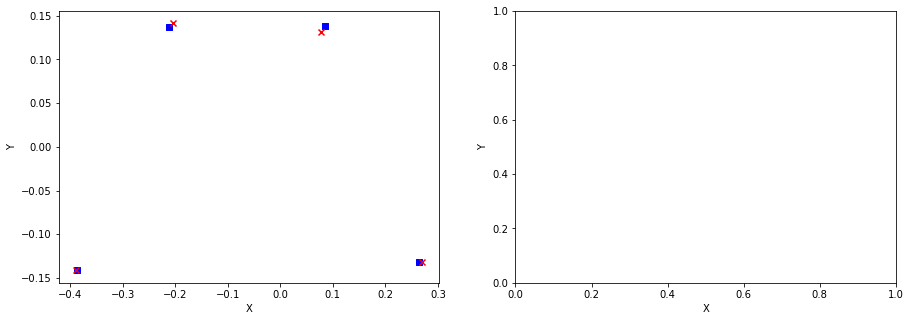

[0.7, 0.0, 0.0] [0. 1.] [[0.16945275]] [[0.01147134]]


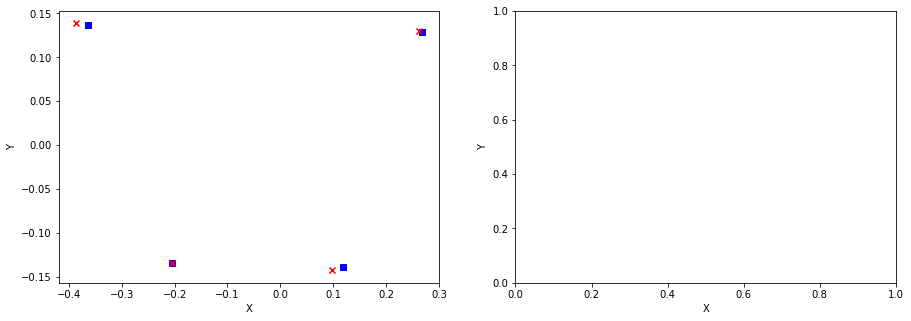

[0.7, 0.0, 0.0] [0. 1.] [[0.15462398]] [[-2.94504347e-05]]


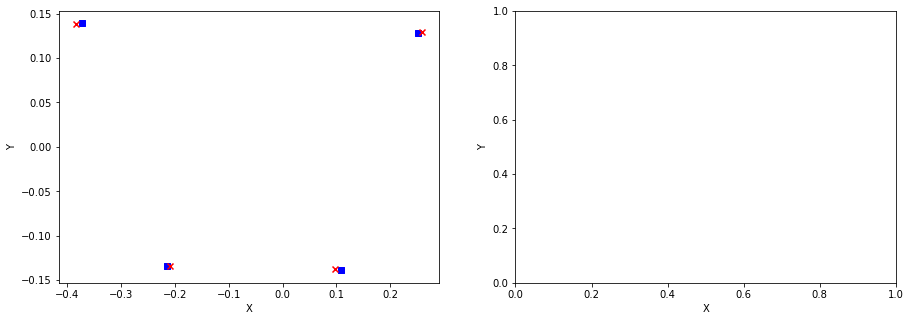

[0.7, 0.0, 0.0] [0. 1.] [[0.18054942]] [[0.00512519]]


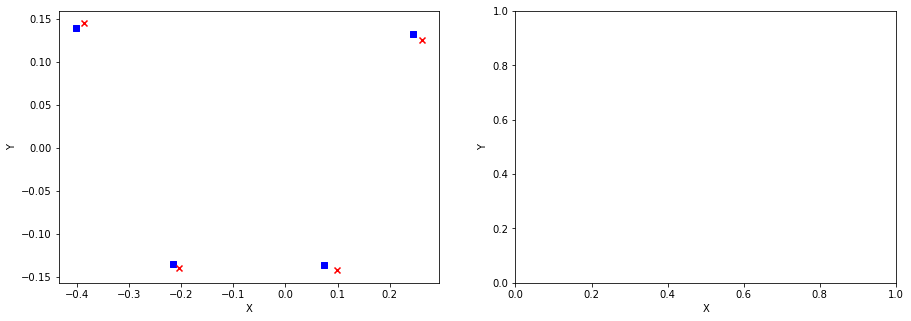

[0.7, 0.0, 0.0] [0. 1.] [[0.15650734]] [[0.00787508]]


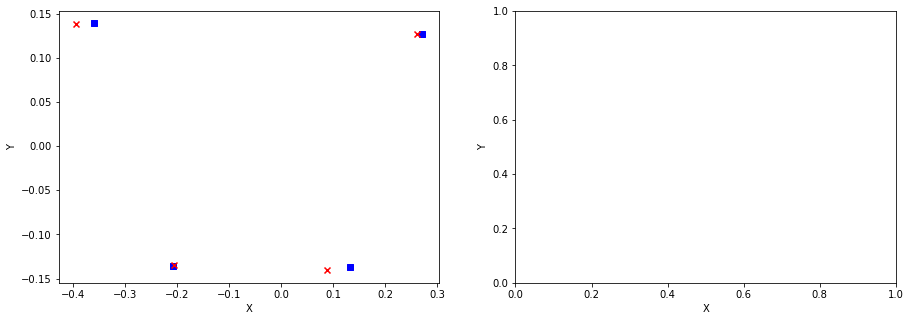

[0.7, 0.0, 0.0] [0. 1.] [[0.15685066]] [[0.00329931]]


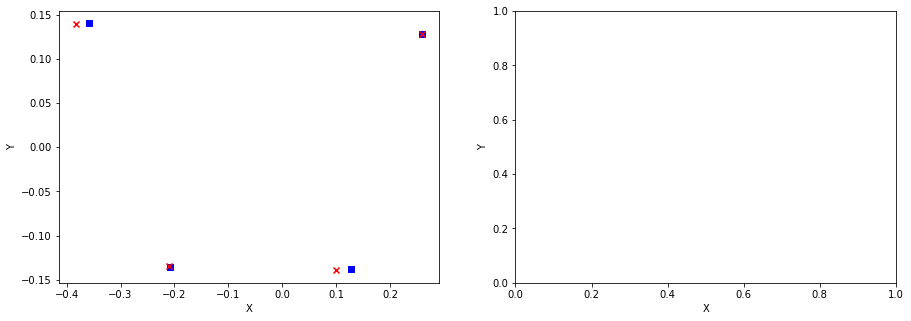

[0.7, 0.0, 0.0] [1. 0.] [[0.17879446]] [[-0.00611346]]


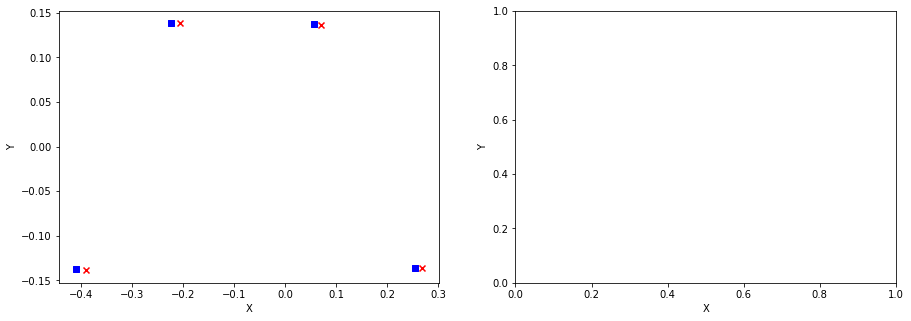

[0.7, 0.0, 0.0] [1. 0.] [[0.17765764]] [[-0.01085726]]


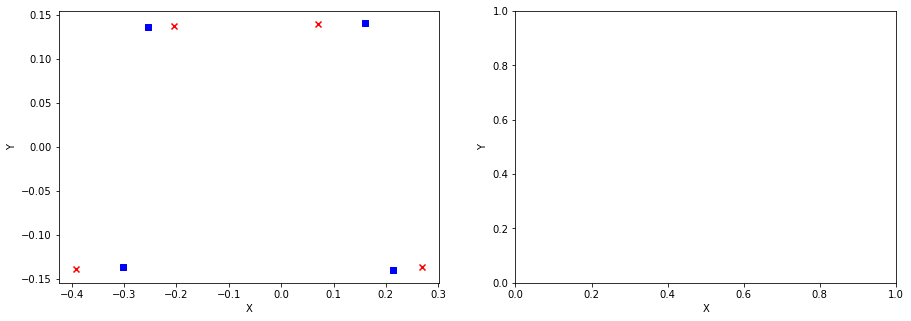

[0.7, 0.0, 0.0] [1. 0.] [[0.17890813]] [[-0.00832571]]


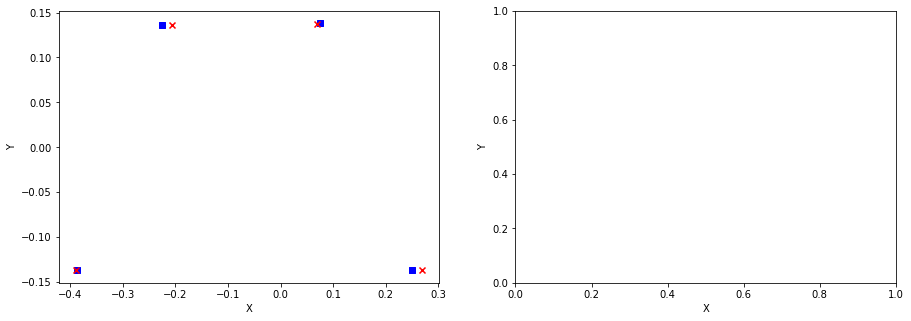

[0.7, 0.0, 0.0] [0. 1.] [[0.15342393]] [[0.00233016]]


KeyboardInterrupt: 

In [55]:
# Visualize footsteps
#for x in range(X_motion_relative.shape[0]):        
while True:
    x = np.random.randint(0, X_motion_relative.shape[0])
    
    if not X_motion_relative[x, 0] > 0.6:
        continue
    
    #fig = plt.figure()
    #ax1 = fig.add_subplot(111)
    #ax2 = fig.add_subplot(111)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # Starting posiitons
    fl_x = X_motion_relative[x, 12]
    fl_y = X_motion_relative[x, 13]
    fr_x = X_motion_relative[x, 15]
    fr_y = X_motion_relative[x, 16]
    rl_x = X_motion_relative[x, 18]
    rl_y = X_motion_relative[x, 19]
    rr_x = X_motion_relative[x, 21]
    rr_y = X_motion_relative[x, 22]
    
    # Target positions
    fl_x_target = X_motion_relative[x+1, 12]
    fl_y_target = X_motion_relative[x+1, 13]
    fr_x_target = X_motion_relative[x+1, 15]
    fr_y_target = X_motion_relative[x+1, 16]
    rl_x_target = X_motion_relative[x+1, 18]
    rl_y_target = X_motion_relative[x+1, 19]
    rr_x_target = X_motion_relative[x+1, 21]
    rr_y_target = X_motion_relative[x+1, 22]

    # Inputs 3D positions        
    xs_input = np.array([fl_x, fr_x, rl_x, rr_x] ,dtype=object)
    ys_input = np.array([fl_y, fr_y, rl_y, rr_y] ,dtype=object)
    
    # Target 3D positions        
    xs_target = np.array([fl_x_target, fr_x_target, rl_x_target, rr_x_target] ,dtype=object)
    ys_target = np.array([fl_y_target, fr_y_target, rl_y_target, rr_y_target] ,dtype=object)
    
    # Predicted 3D positions        
    xs_prediction = []
    ys_prediction = []
    
    # CoM
    predicted_com = [0, 0]
    
    # Prediction input
    input_ = np.array([X_motion_relative[x, 0], X_motion_relative[x, 1], X_motion_relative[x, 5], fl_x, fl_y, fr_x, fr_y, rl_x, rl_y, rr_x, rr_y]).reshape(-1, 1).T
    
    # FR and RL moving
    if X_motion_relative[x, 24]:
        fl_x_predicted = model_fl_relative_support_x.predict(input_)
        fl_y_predicted = model_fl_relative_support_y.predict(input_)
        fr_x_predicted = model_fr_relative_swinging_x.predict(input_)
        fr_y_predicted = model_fr_relative_swinging_y.predict(input_)
        rl_x_predicted = model_rl_relative_swinging_x.predict(input_)
        rl_y_predicted = model_rl_relative_swinging_y.predict(input_)
        rr_x_predicted = model_rr_relative_support_x.predict(input_)
        rr_y_predicted = model_rr_relative_support_y.predict(input_)
        
        predicted_com[0] = model_fr_com_x.predict(input_)
        predicted_com[1] = model_fr_com_y.predict(input_)
        
        xs_prediction.append([X_motion_relative[x, 12] + fl_x_predicted,
                              X_motion_relative[x, 15] + fr_x_predicted,
                              X_motion_relative[x, 18] + rl_x_predicted,
                              X_motion_relative[x, 21] + rr_x_predicted])
        
        ys_prediction.append([X_motion_relative[x, 13] + fl_y_predicted,
                              X_motion_relative[x, 16] + fr_y_predicted,
                              X_motion_relative[x, 19] + rl_y_predicted,
                              X_motion_relative[x, 22] + rr_y_predicted])
    # FL and RR moving
    else:
        fl_x_predicted = model_fl_relative_swinging_x.predict(input_)
        fl_y_predicted = model_fl_relative_swinging_y.predict(input_)
        fr_x_predicted = model_fr_relative_support_x.predict(input_)
        fr_y_predicted = model_fr_relative_support_y.predict(input_)
        rl_x_predicted = model_rl_relative_support_x.predict(input_)
        rl_y_predicted = model_rl_relative_support_y.predict(input_)
        rr_x_predicted = model_rr_relative_swinging_x.predict(input_)
        rr_y_predicted = model_rr_relative_swinging_y.predict(input_)
        
        predicted_com[0] = model_fl_com_x.predict(input_)
        predicted_com[1] = model_fl_com_y.predict(input_)
        
        xs_prediction.append([X_motion_relative[x, 12] + fl_x_predicted,
                              X_motion_relative[x, 15] + fr_x_predicted,
                              X_motion_relative[x, 18] + rl_x_predicted,
                              X_motion_relative[x, 21] + rr_x_predicted])
        
        ys_prediction.append([X_motion_relative[x, 13] + fl_y_predicted,
                              X_motion_relative[x, 16] + fr_y_predicted,
                              X_motion_relative[x, 19] + rl_y_predicted,
                              X_motion_relative[x, 22] + rr_y_predicted])
        
    print(X_motion_relative[x, :2].tolist() + [X_motion_relative[x, 5]], X_motion_relative[x, 24:26], predicted_com[0], predicted_com[1])
    
    # Predictions 3D positions        
    #xs_predictions = np.array([fl_x + fl_predicted_movement_x, fr_x + fr_predicted_movement_x, rl_x + rl_predicted_movement_x, rr_x + rr_predicted_movement_x] ,dtype=object)
    #ys_predictions = np.array([fl_y + fl_predicted_movement_y, fr_y + fr_predicted_movement_y, rl_y + rl_predicted_movement_y, rr_y + rr_predicted_movement_y] ,dtype=object)

    #axes[0].scatter(xs_input, ys_input, marker='o', c='b', label="Starting Config.")
    axes[0].scatter(xs_target, ys_target, marker='s', c='b', label="Target Config.")
    #axes[0].scatter(0, 0, marker='^', c= 'c', label="Starting CoM")
    #axes[0].scatter(Y_motion_CoM[x,0], Y_motion_CoM[x,1], marker='^', c= 'm', label="Target CoM")
    #axes[0].scatter(predicted_com[0], predicted_com[1], marker='^', c= 'r', label="Predicted CoM")
    
    #axes[1].scatter(xs_target, ys_target, marker='s', c='r', label="Target Config.")
    axes[0].scatter(np.array(xs_prediction, dtype=object), np.array(ys_prediction, dtype=object), marker='x', c='r', label="Predicted Config.")
    
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    
    # Legend
    #blue_patch = mpatches.Patch(color='b', label='Target Feet Configuration')
    #cyan_patch = mpatches.Patch(color='c', label='Current CoM')
    #magenta_patch = mpatches.Patch(color='m', label='Target CoM')
    #red_patch = mpatches.Patch(color='r', label='Predicted Feet Configuration')
    #plt.legend(handles=[blue_patch, red_patch])
    
    plt.show()